In [1]:
import pandas as pd
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from normalizer import Normalizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from results import ModelEvaluation

    Load the data

In [2]:
data = pd.read_csv("../dataset/TwitterDataset.txt", sep="\t")

    Let's describe the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39776 entries, 0 to 39775
Data columns (total 3 columns):
 #   Column                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                          --------------  ----- 
 0   TrainSen                                                                                                                        39776 non-null  object
 1   0                                                                                                                               39776 non-null  int64 
 2   @0430yes i hope youre lurking rn. i want to listen to hallucination & wanna love you again live someday, pretty please?! 😭 😭 😭  39776 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.4+ KB


    There are no column names let's provide column names.

In [4]:
data.columns = ["sample_type", "label", "text"] #changes column names of the dataset.
data = data.drop(columns=["sample_type"]) #drop the redudant column.
data = data.sample(frac=1, random_state=42).reset_index(drop=True) #shuffle the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39776 entries, 0 to 39775
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   39776 non-null  int64 
 1   text    39776 non-null  object
dtypes: int64(1), object(1)
memory usage: 621.6+ KB


In [6]:
data.head(10)

,label,text
0,1,About to make up an entire essay good think I'...
1,0,@bonnielazzara @gamegirl404 @claudia_cpucci @H...
2,1,American Literature has been an interesting co...
3,1,@rachelkcollier sound like backing vocalists #...
4,1,I said I was gonna wash my face before I went ...
5,1,I used to think i was good at multi-tasking. T...
6,1,It's okay to burn a flag with your 1st Amendme...
7,0,🌸💐🌸💐🌸 HAPPY FRIDAY Blessings ~Love ~Light Wish...
8,1,last picture with my beautifull sister 3 R. I....
9,1,Side joy of business travel : spur of the mome...


    Get sparse matrix representation of the text:

In [7]:
normarlizer = Normalizer()
matrix = normarlizer.vectorize(pd.DataFrame({"text": data["text"]}))

[INFO] Trying to create a sparse matrix for text, using an instance of TfIdf_vectorizer
[INFO] Extracting columns containing text from dataframe.
[INFO] Successfully extracted text columns from the dataset.
[INFO] Applying Normalization over text:
[INFO]       - Converting Text into lower case for caseconsistency.
[INFO]       - Extracting only words containing alphabets.
[INFO] Text Normalization is now complete.
[INFO] Fitting the vecotirzer to given text.
[INFO] Transforming the text into a sparse matrix.
[INFO] Sparse Matrix has been successfully created over the text given as input.


    Let's look at the matrix:

In [8]:
matrix

<39776x34292 sparse matrix of type '<class 'numpy.float64'>'
	with 550273 stored elements in Compressed Sparse Row format>

    Let's hold out some data for testing.

In [9]:
y = data["label"]
X = matrix.toarray()
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    Let's now fit a LogisticRegression model to this:

In [10]:
LR = LogisticRegression(max_iter=1000)

In [11]:
LR = LR.fit(X_train, y_train)

    Let's test the LR model:

In [12]:
y_pred = LR.predict(X_test)
results = ModelEvaluation()

In [13]:
results.classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      4279
           1       0.80      0.73      0.76      3677

    accuracy                           0.79      7956
   macro avg       0.79      0.79      0.79      7956
weighted avg       0.79      0.79      0.79      7956



    We are getting close to 80~

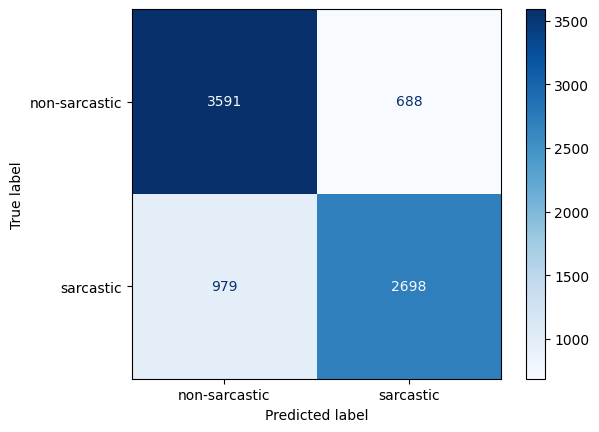

In [14]:
results.get_cm(y_true=y_test, y_pred=y_pred)

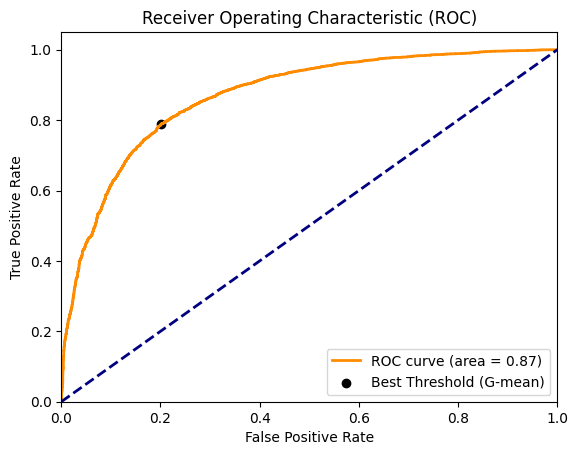

Best Threshold=0.4556


In [15]:
y_proba = LR.predict_proba(X_test)[:, 1]
y_proba[:10]
threshold = results.get_roc(y_true=y_test, y_scores=y_proba)

    The model might be overfitting. Let's perform crossvalidation

In [16]:
results.cross_validation_score(LR, X, y, "accuracy")

Cross-validation scores for each fold: [0.79386626 0.79497172 0.79057197 0.79484601 0.78680075]
Mean score: 0.7922113421429428
Standard Deviation of the scores: 0.003138850451606218


array([0.79386626, 0.79497172, 0.79057197, 0.79484601, 0.78680075])

    The model is doing well.

In [17]:
import joblib

joblib.dump(LR, "../TwitterDataModels/TrainedModels/LogisticRegression.joblib")

['../TwitterDataModels/TrainedModels/LogisticRegression.joblib']